In [1]:
from keys import FTX_API_KEY, FTX_API_SECRET
import seaborn as sns
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utility_classes.correlation import Correlation, CSVManager
from utility_classes.historical_data_processor import FTXDataProcessor
# from utility_classes.csv_manager import CSVManager
acc = FTXDataProcessor(api_key=FTX_API_KEY, api_secret=FTX_API_SECRET)
corr = Correlation(
        spread_folder_path='/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_spreads',
        perp_folder_path='/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_perps',
        futures_folder_path='/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/expired_futures_data')

plt.rcParams['figure.figsize'] = [35, 35]


## Pearson's coefficient for spreads
### draw the daily spread heatmap for futures expiring in 2020/09/25 and 2020/12/25, with minimum value set to 0 


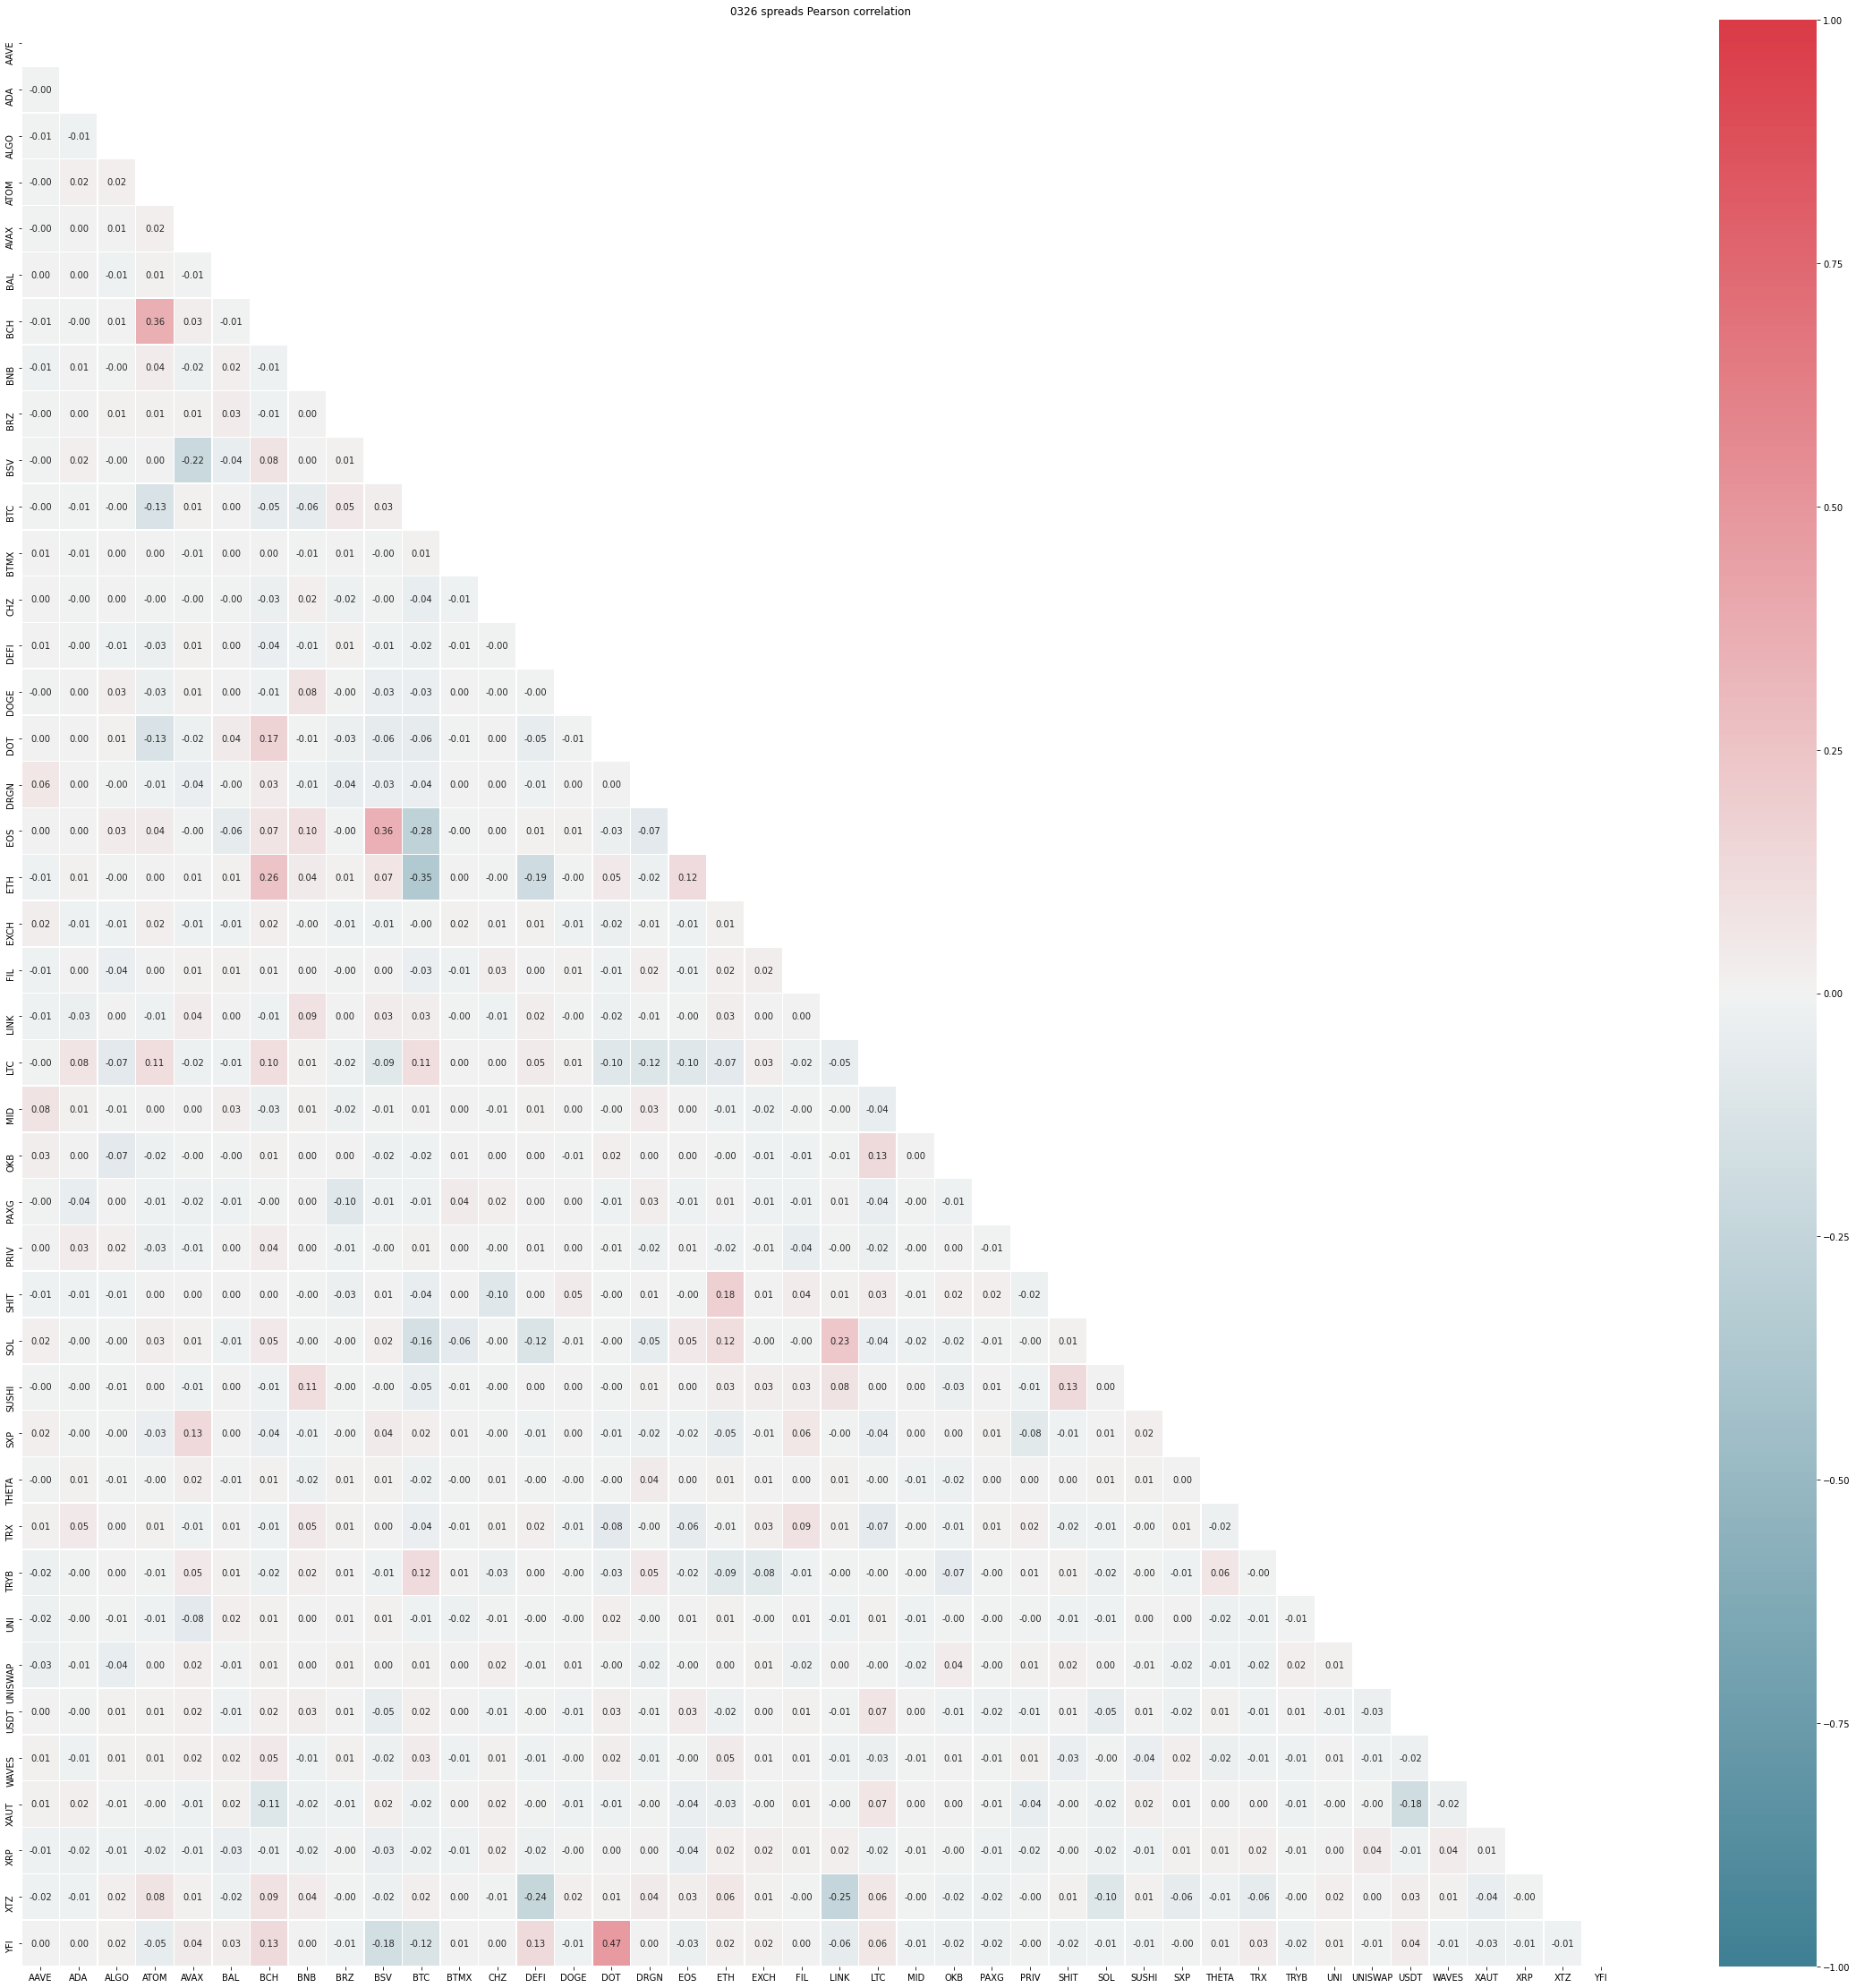

spreads from 2020-12-14T07:27:00+00:00 to 2021-03-26T03:00:00+00:00
['BCH', 'BNB', 'BTC', 'BTMX', 'DEFI', 'DOT', 'EOS', 'ETH', 'FIL', 'LTC', 'SOL', 'SUSHI', 'TRYB', 'USDT', 'WAVES', 'XRP', 'XTZ'] have missing values


spreads from 2020-09-11T18:40:00+00:00 to 2020-12-25T03:00:00+00:00
['BTC', 'MTA'] have missing values


In [4]:
corr.spreads_correlation_heatmap(futures_date='0326', coint=False, triangular=True, timeframe='H', annot=True)
corr.spreads_correlation_heatmap(futures_date='1225', coint=False, triangular=True, timeframe='H', annot=True)

## Cointegration test among spreads. Here, looking for scores less than 0.05 to reject the null hypothesis that there is no cointegration
### more reading on correlation vs cointegration https://www.r-bloggers.com/2017/11/cointegration-correlation-and-log-returns/

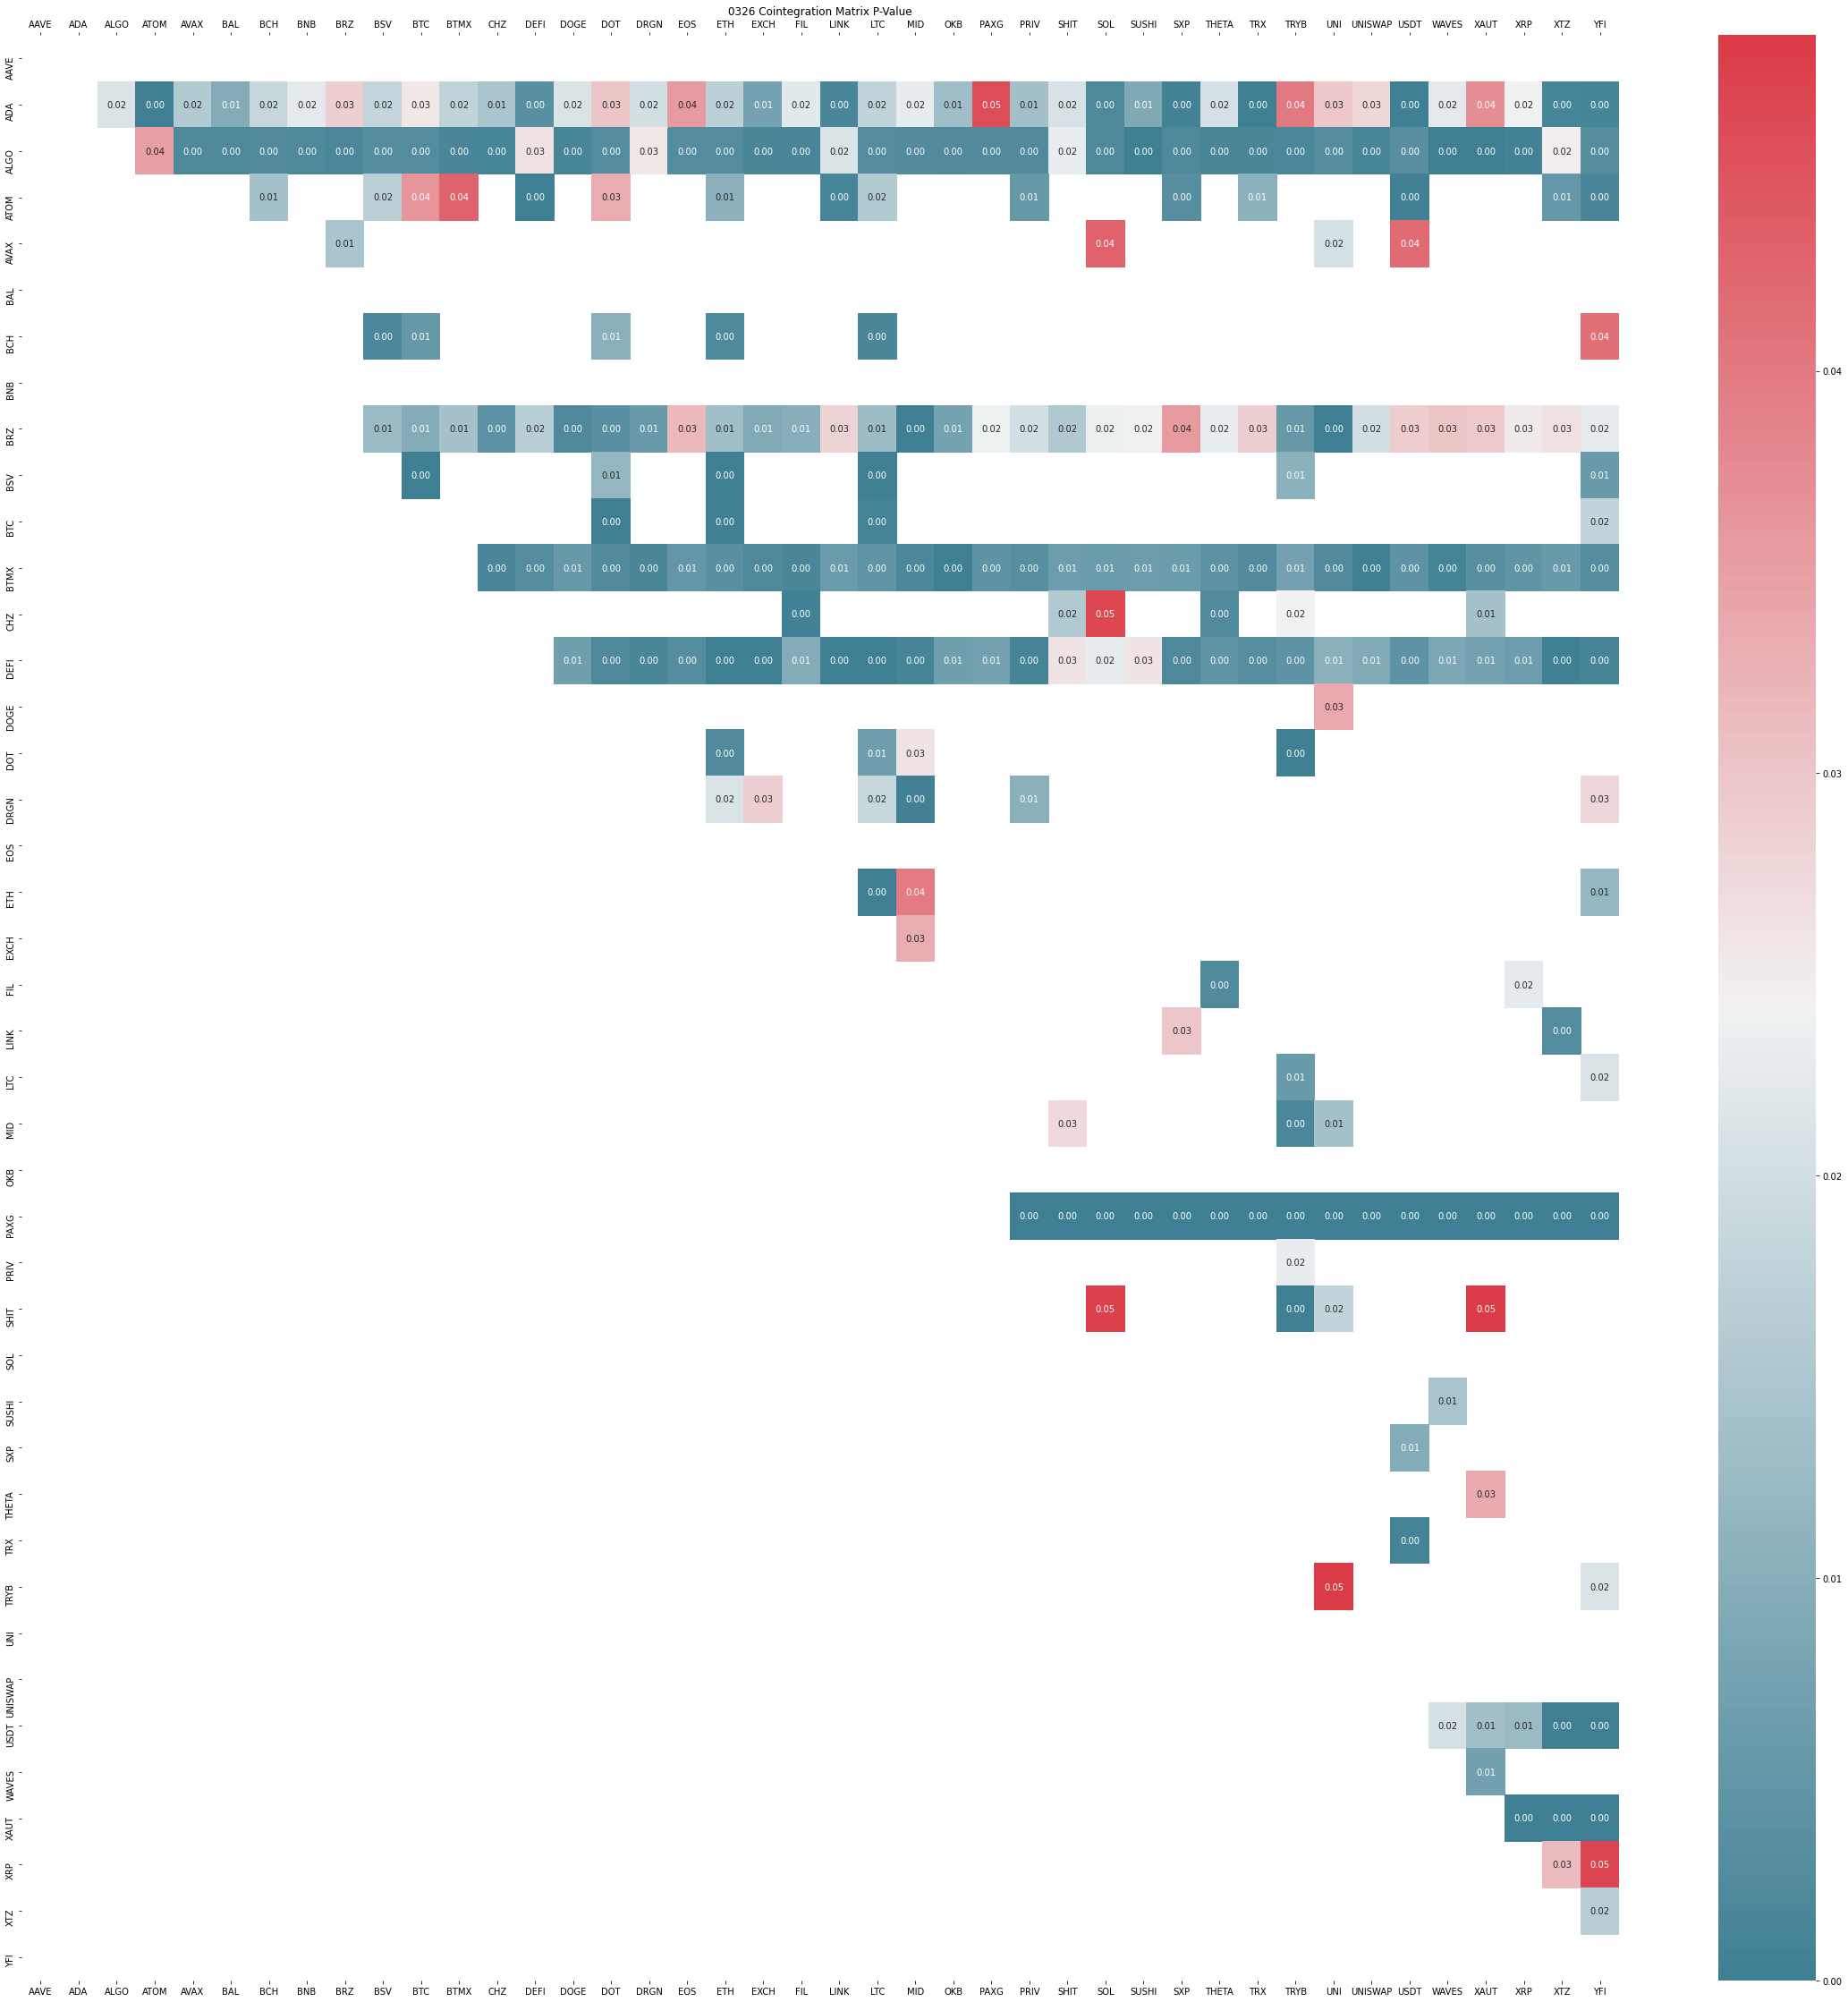

spreads from 2020-12-14T07:27:00+00:00 to 2021-03-26T03:00:00+00:00
['BCH', 'BNB', 'BTC', 'BTMX', 'DEFI', 'DOT', 'EOS', 'ETH', 'FIL', 'LTC', 'SOL', 'SUSHI', 'TRYB', 'USDT', 'WAVES', 'XRP', 'XTZ'] have missing values


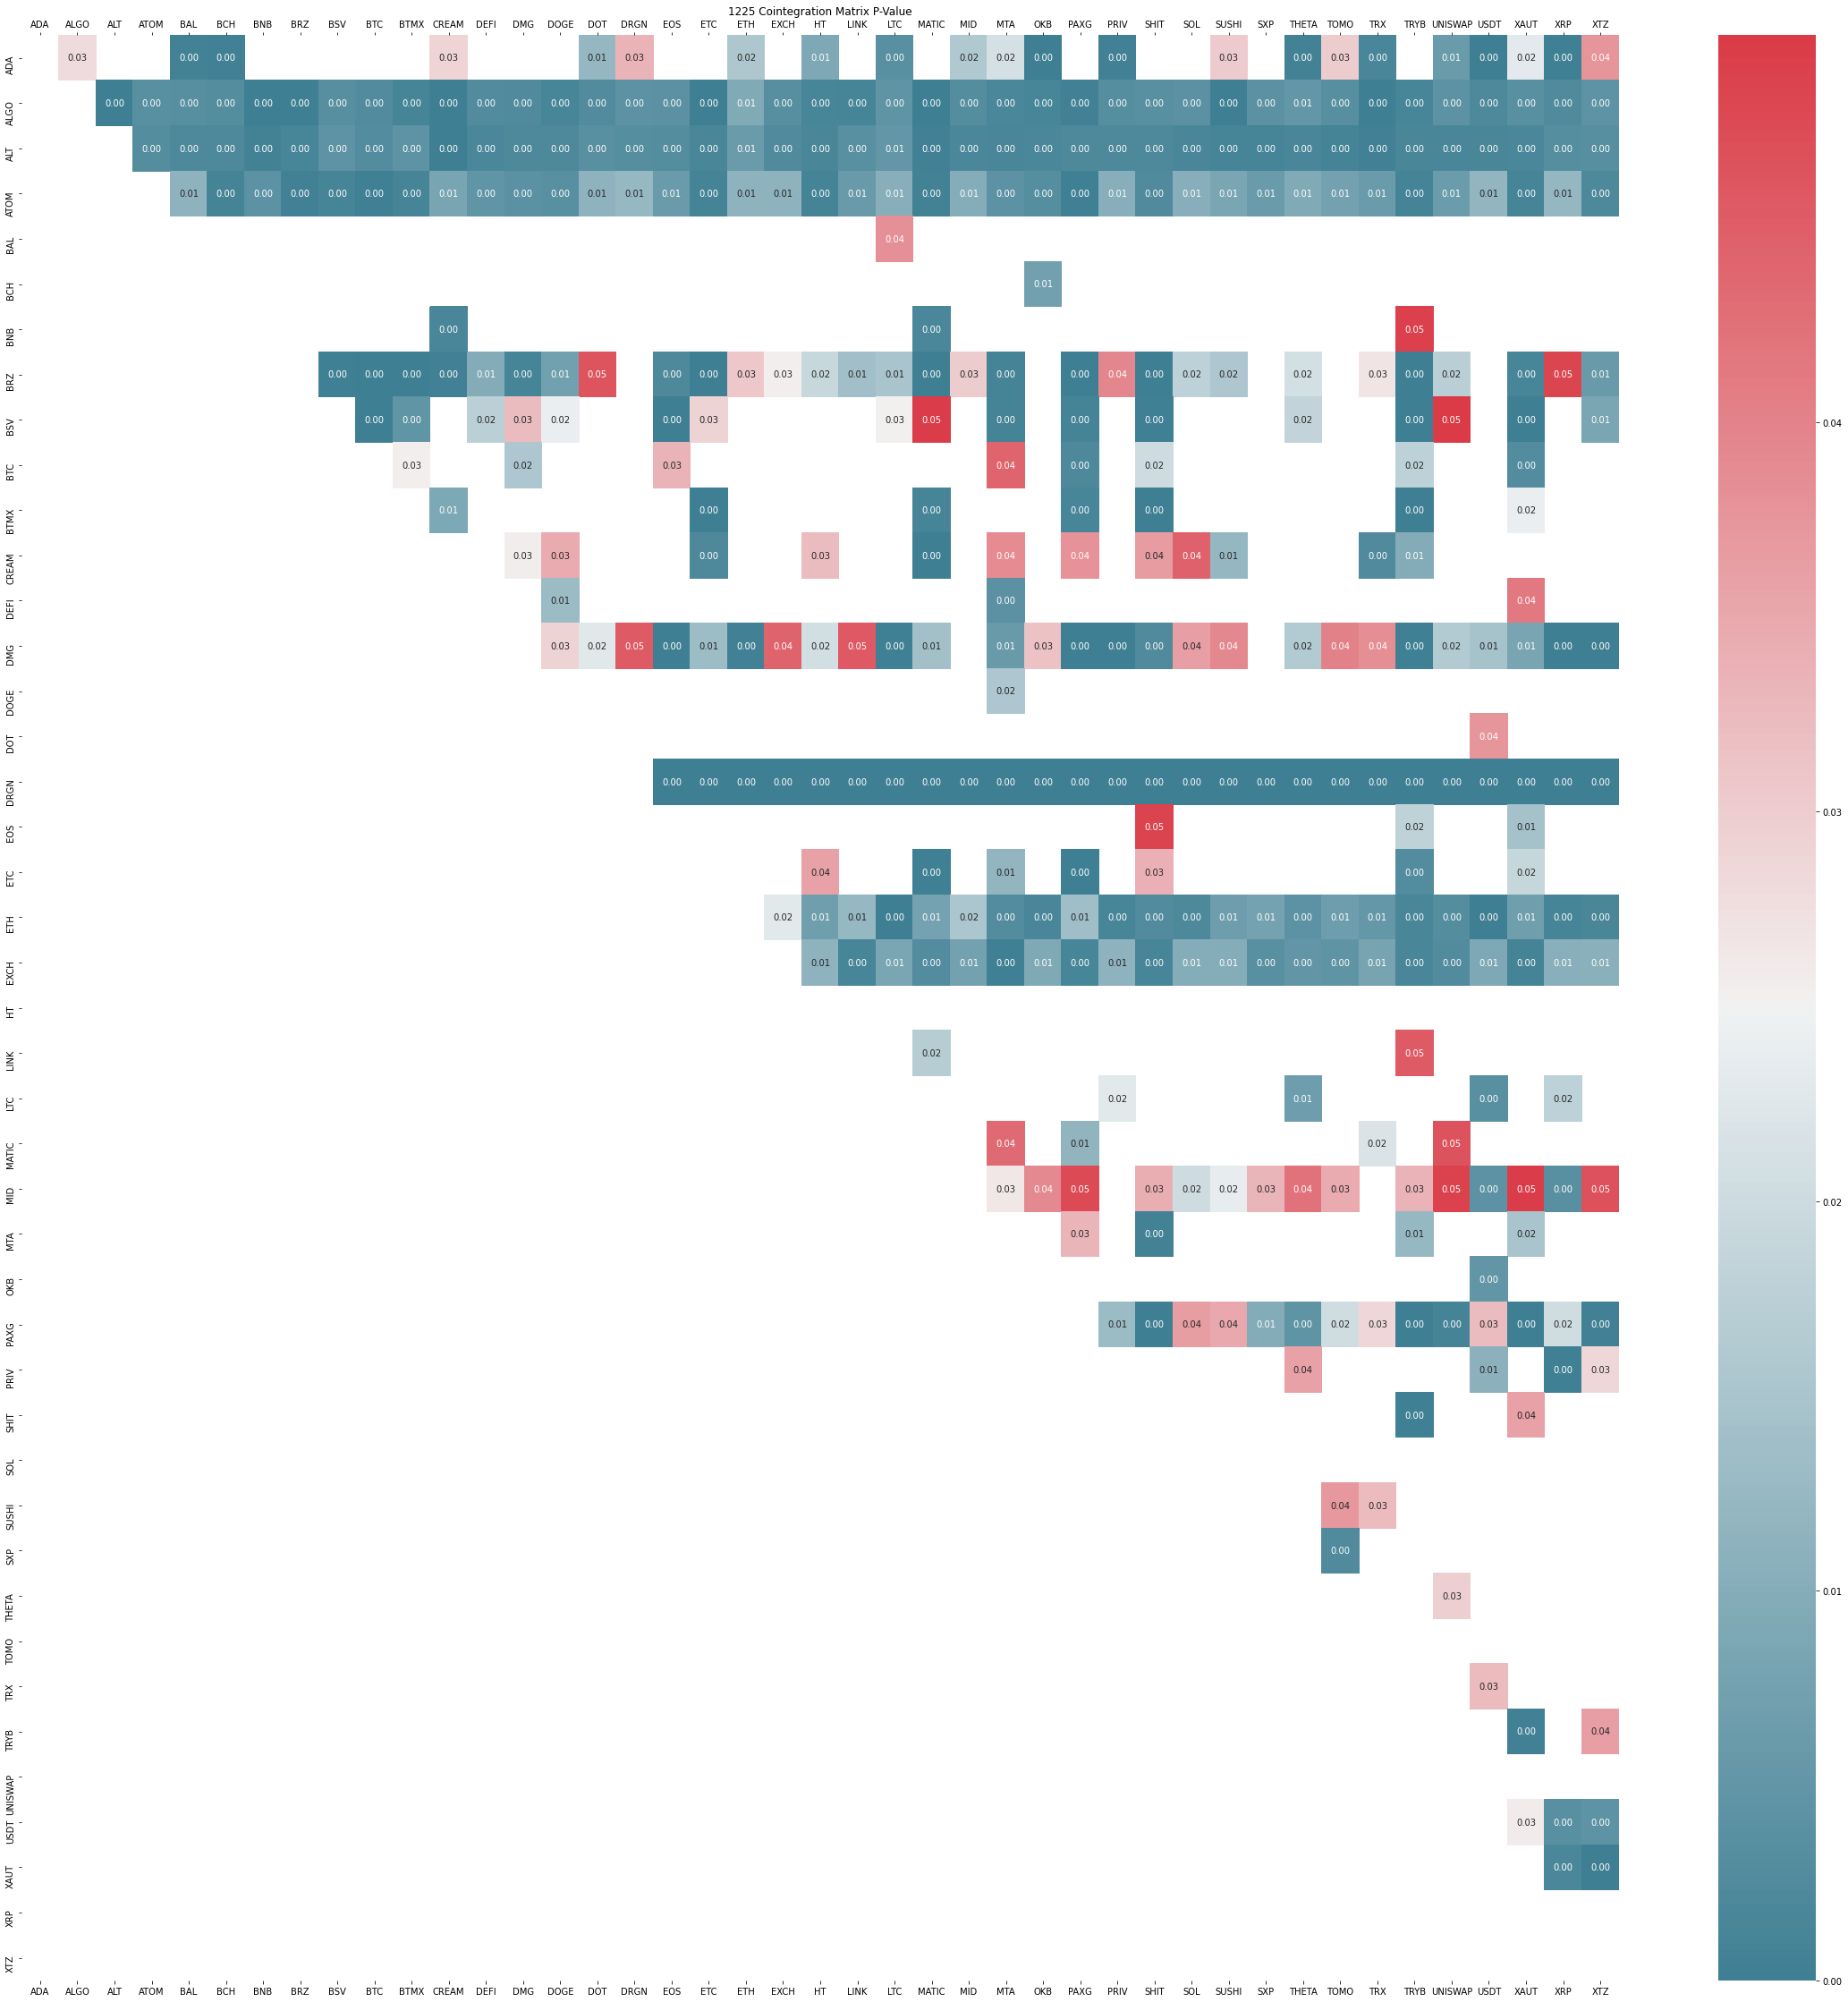

spreads from 2020-09-11T18:40:00+00:00 to 2020-12-25T03:00:00+00:00
['BTC', 'MTA'] have missing values


In [2]:
corr.spreads_correlation_heatmap(futures_date='0326', coint=True, timeframe='H', showing_only_below_threshold=True, annot=True)
corr.spreads_correlation_heatmap(futures_date='1225', coint=True, timeframe='H', showing_only_below_threshold=True, annot=True)


## the perp-future spread cointegration test among different assets 
### comparing to the above heatmap, where 'spreads of spreads' is being tested, here the subject is only perp-future spread

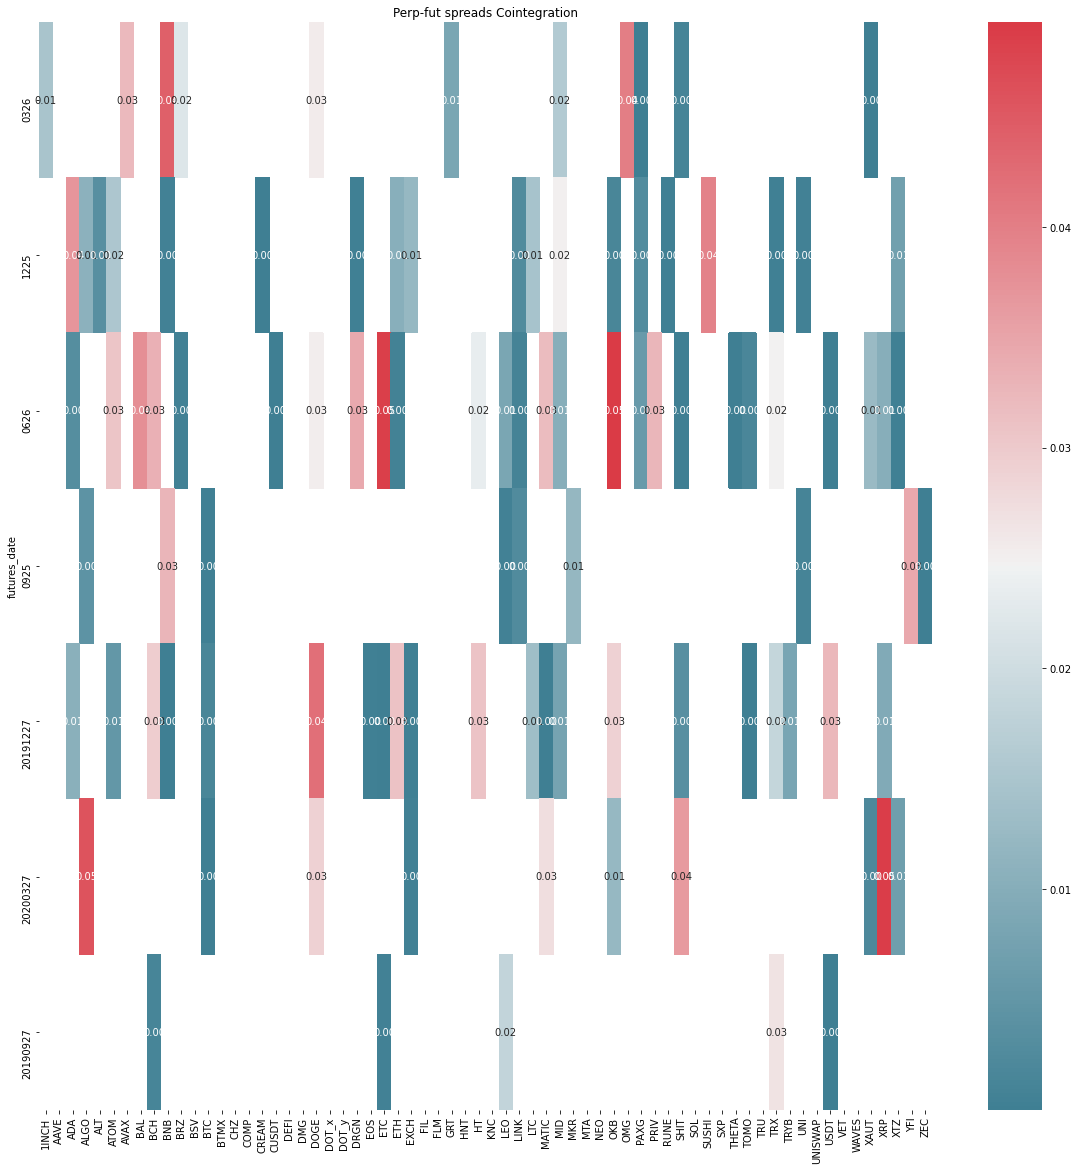

In [2]:
corr.pair_coint(True, 'H')


### Get a visual sanity check to see the cointegrated pairs' historical spreads 

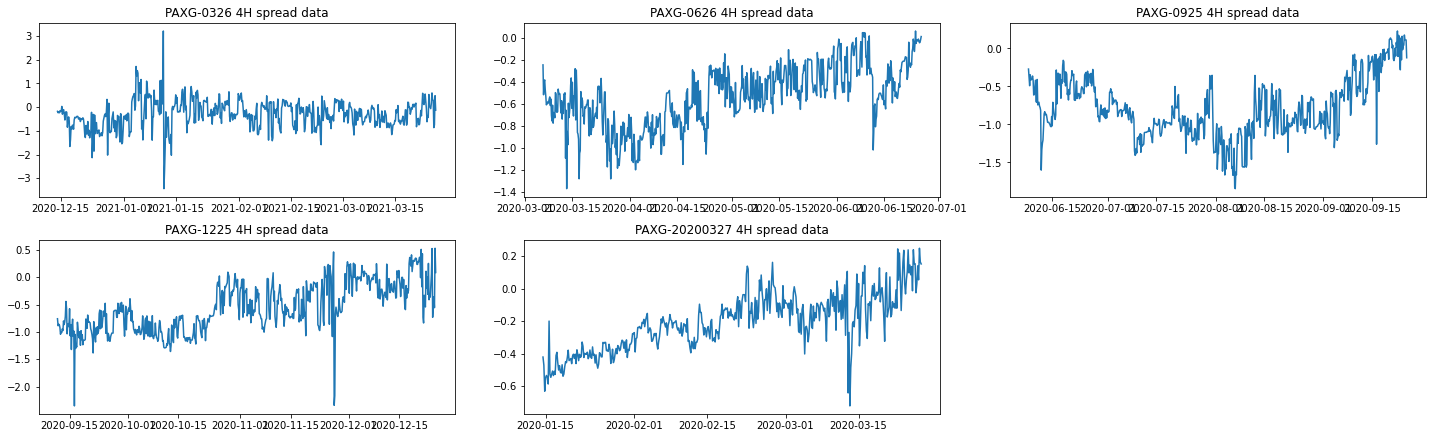

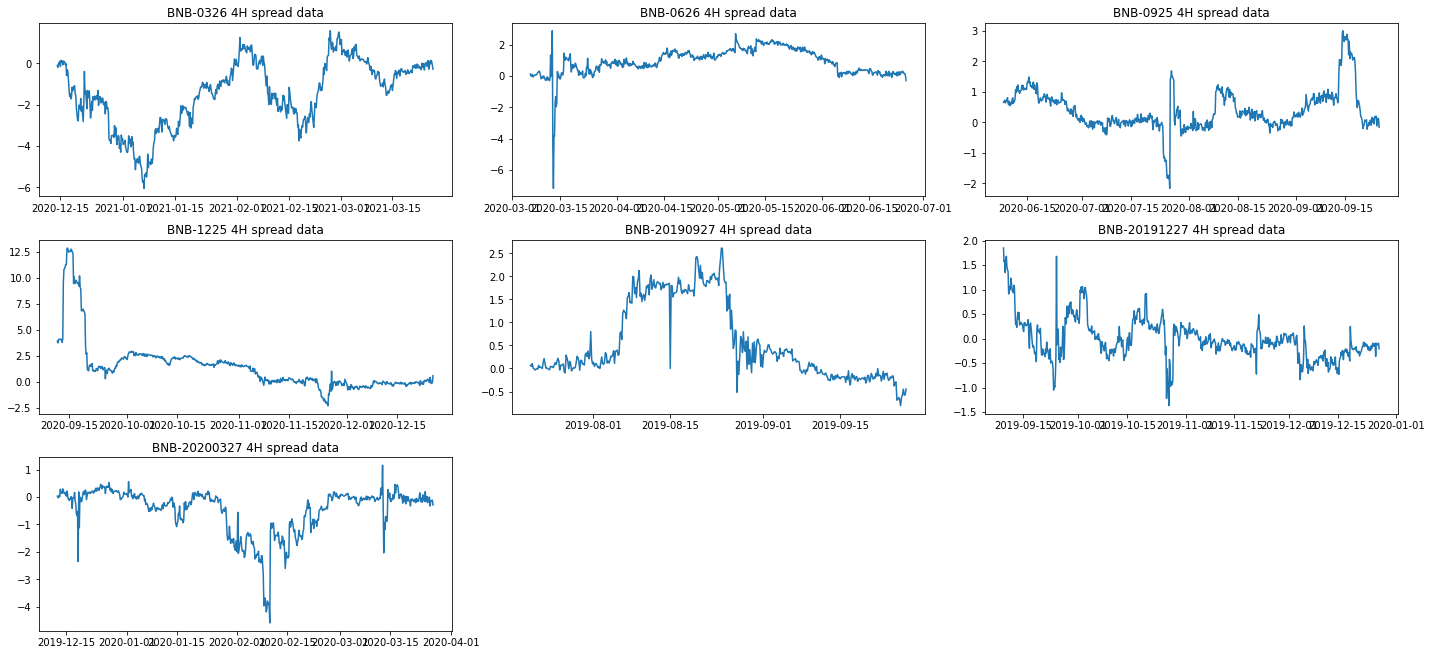

In [5]:
corr.plot_historical_spread('MID', '4H')
corr.plot_historical_spread('PAXG', '4H')
corr.plot_historical_spread('BNB', '4H')


# Conclusion: so far, only a few tokens exibits cointegrated behaviors in recent past (2021/03/31)